In [1]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr

%matplotlib inline
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

### Read the data

In [34]:
nc = NetCDFFile('data/cams_emissions/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2017.nc') 


In [36]:
nc.variables
# len(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
 float32 time(time)
     long_name: time
     standard_name: time
     units: days since 1900-01-01 00:00
     calendar: gregorian
 unlimited dimensions: 
 current shape = (12,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: latitude
     standard_name: latitude
     units: degrees_north
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: longitude
     standard_name: longitude
     units: degrees_east
 unlimited dimensions: 
 current shape = (1440,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'crs': <class 'netCDF4._netCDF4.Variable'>
 int32 crs()
     grid_mapping_name: latitude_longitude
     semi_major_axis: 6371000.0
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValu

In [37]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
# time_step = nc.variables['TSTEP'][:]
emiss_bio = nc.variables['emiss_bio'][:]
emiss_bio_hourly = nc.variables['emiss_bio_hourly'][:]

In [38]:
lat

masked_array(data=[-90.  , -89.75, -89.5 , -89.25, -89.  , -88.75, -88.5 ,
                   -88.25, -88.  , -87.75, -87.5 , -87.25, -87.  , -86.75,
                   -86.5 , -86.25, -86.  , -85.75, -85.5 , -85.25, -85.  ,
                   -84.75, -84.5 , -84.25, -84.  , -83.75, -83.5 , -83.25,
                   -83.  , -82.75, -82.5 , -82.25, -82.  , -81.75, -81.5 ,
                   -81.25, -81.  , -80.75, -80.5 , -80.25, -80.  , -79.75,
                   -79.5 , -79.25, -79.  , -78.75, -78.5 , -78.25, -78.  ,
                   -77.75, -77.5 , -77.25, -77.  , -76.75, -76.5 , -76.25,
                   -76.  , -75.75, -75.5 , -75.25, -75.  , -74.75, -74.5 ,
                   -74.25, -74.  , -73.75, -73.5 , -73.25, -73.  , -72.75,
                   -72.5 , -72.25, -72.  , -71.75, -71.5 , -71.25, -71.  ,
                   -70.75, -70.5 , -70.25, -70.  , -69.75, -69.5 , -69.25,
                   -69.  , -68.75, -68.5 , -68.25, -68.  , -67.75, -67.5 ,
                   -67.25

In [ ]:
lon

In [24]:
time

masked_array(data=[44560., 44591., 44619., 44650., 44680., 44711., 44741.,
                   44772., 44803., 44833., 44864., 44894.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [23]:
time_step

masked_array(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
             mask=False,
       fill_value=999999)

In [39]:
emiss_bio

masked_array(
  data=[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

In [40]:
emiss_bio_hourly

masked_array(
  data=[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

### Plot the data

In [41]:
fn = 'data/cams_emissions/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2017.nc'
ds = xr.open_dataset(fn, decode_times=False)
ds

<xarray.Dataset>
Dimensions:           (time: 12, lat: 720, lon: 1440)
Coordinates:
  * time              (time) float32 4.31e+04 4.313e+04 ... 4.34e+04 4.343e+04
  * lat               (lat) float32 -90.0 -89.75 -89.5 ... 89.25 89.5 89.75
  * lon               (lon) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    crs               int32 ...
    gridcell_area     (lat) float32 ...
    emiss_bio_hourly  (time, lat, lon) float32 ...
    emiss_bio         (time, lat, lon) float32 ...
Attributes:
    name:                      MEGANv2.10 biogenic emissions - SSRD
    metfile:                   ERA5  met data on 025x025 grid
    projection:                latlon          
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    source:                    Driving variables are: landcover, weather, and...
    references:                Sindelarova, K., Granier, C., Bouarar, I., Gue...
    product_version:           v3.1
    institution:               Charles University in Prague, Fac. of Mathemat...
    title:                     CAMS-BIO Global biogenic emissions
    distribution_date:         2023-10-12
    history:                   2023-05-23: Processed by ECCAD from original m...

In [42]:
da = ds['emiss_bio']
da

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
[12441600 values with dtype=float32]
Coordinates:
  * time     (time) float32 4.31e+04 4.313e+04 4.316e+04 ... 4.34e+04 4.343e+04
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
Attributes:
    units:             kg m-2 s-1
    molecular_weight:  68.0
    standard_name:     tendency_of_atmosphere_mass_content_of_isoprene_due_to...
    sector_name:       Biogenic
    cell_methods:      TSTEP: mean time: mean
    long_name:         isoprene

(array([1.2175179e+07, 1.9384700e+05, 5.5186000e+04, 1.3051000e+04,
        2.9480000e+03, 8.9300000e+02, 3.6400000e+02, 1.0800000e+02,
        2.2000000e+01, 2.0000000e+00]),
 array([0.        , 0.00059419, 0.00118839, 0.00178258, 0.00237678,
        0.00297097, 0.00356516, 0.00415936, 0.00475355, 0.00534774,
        0.00594194], dtype=float32),
 <BarContainer object of 10 artists>)

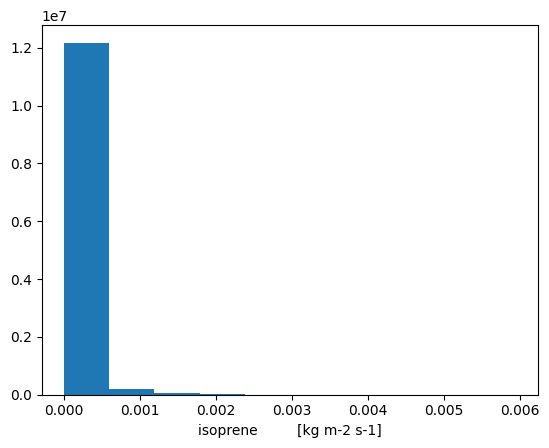

In [43]:
da.plot()

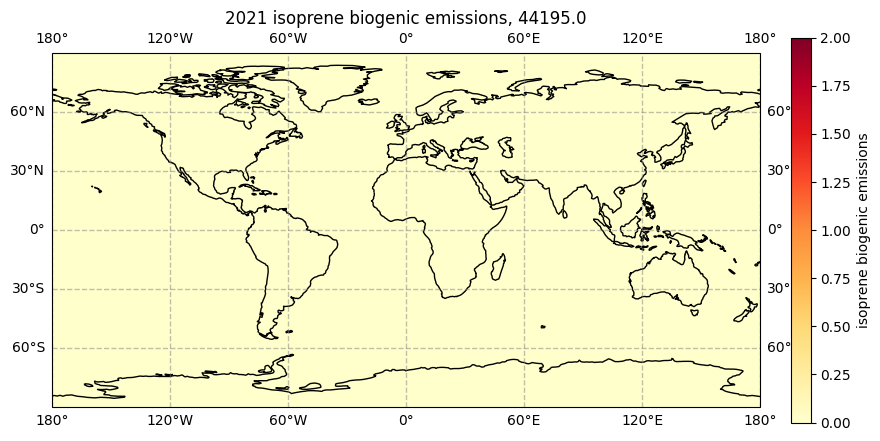

In [5]:
fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
ax.set_title(f'2021 isoprene biogenic emissions, {str(da.time[0].values)}', fontsize=12) # Set figure title
ax.coastlines(color='black') # Add coastlines
im = plt.pcolormesh(da.lon, da.lat, da[0,:,:], cmap='YlOrRd', vmin=0, vmax=2) # Plot the data
cbar = plt.colorbar(im,fraction=0.046, pad=0.04) # Specify the colourbar
cbar.set_label('isoprene biogenic emissions') # Define the colourbar label

In [6]:
frames = 12

def animate(i):
    array = da[i,:,:].values
    im.set_array(array.flatten())
    ax.set_title(f'isoprene biogenic emissions, {str(da.time[i].values)}', fontsize=12)

In [7]:
ani = animation.FuncAnimation(fig, animate, frames, interval=150)

In [8]:
HTML(ani.to_jshtml())